The purpose of this project is to determine which hitting metrics are the best indicators of a higher batting average. 

In [1]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,confusion_matrix   
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing  
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import pandas as pd  
%matplotlib inline  


In [2]:
#Files
exit_velocity_hitters_file= 'exit_velocity_hitters.csv'  
exit_velocity_hitters_df= pd.read_csv(exit_velocity_hitters_file)
expected_stats_hitterscsv_file = 'expected_stats._hitterscsv 2.csv'
expected_stats_hitterscsv_df = pd.read_csv(expected_stats_hitterscsv_file)
#Drop columns 
exit_velocity_hitters_df.drop(['attempts','max_hit_speed','max_distance',
                              'avg_distance', 'avg_hr_distance','barrels','ev95plus','last_name, first_name',
                              ],axis=1,inplace=True) 
expected_stats_hitterscsv_df.drop(['last_name, first_name','year', 'pa','est_ba_minus_ba_diff',
                                   'est_slg_minus_slg_diff',  'est_woba_minus_woba_diff'
                              ],axis=1,inplace=True)  

#Merge the columns and filter the data
hitters=pd.merge(exit_velocity_hitters_df,expected_stats_hitterscsv_df, on='player_id') 
hitters=hitters.loc[(hitters['ba']>=.210)] 

The purpose of filtering the data to find hitters with ba of at least .210 is to find which players had high ba and high est_ba and then deterimne which metrics are most correlated to a high ba. 

# Find the relationship between a  BA over .210 and Avg Exit Velocity, EV50, Chase Rate, fbld, gb, brl_percent, and expected BA for hitters

## Multiple linear regression to compare average exit velocity metrics  to ba

In [187]:
X = hitters[['ev50','avg_hit_speed','ev95percent']].values
y = hitters['ba'].values
#X = X.reshape(-1,len(X))  
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.20, 
                                                    random_state = 22, 
                                                    stratify = None)  
linreg = LinearRegression()  
# Fit the model to the training data
linreg.fit(X_train, y_train)

# Make predictions with test set
y_pred = linreg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [0.26280908 0.25957743], Actual Values: [0.264 0.25 ]


In [188]:
# Compute  MSE, R^2
mse = mean_squared_error(y_test, y_pred, squared=True)
print("MSE: {}".format(mse))  
r_score = r2_score(y_test,y_pred) 
print("r^2: {}".format(r_score)) 

MSE: 0.0005823994072185345
r^2: 0.09202765021609338


The model is able to accuralty predict batting average despite the correlation between batting average and exit velocity metrics being very minimal

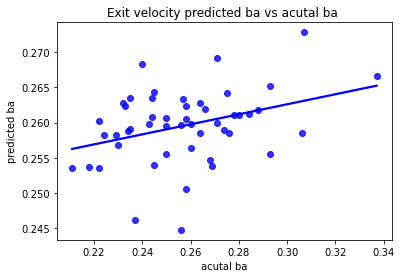

In [189]:
plot = sns.regplot(x=y_test, y=y_pred, ci=None, color="b")  
plot.set(xlabel='acutal ba', ylabel='predicted ba',title='Exit velocity predicted ba vs acutal ba ') 

plt.show()

## Show the Relationship between hit launch angles to ba

In [159]:
X = hitters[['anglesweetspotpercent','avg_hit_angle']].values
y = hitters['ba'].values 
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.20, 
                                                    random_state = 22, 
                                                    stratify = None)  
linreg = LinearRegression() 
# Fit the model to the training data
linreg.fit(X_train, y_train)

# Make predictions with test set
y_pred = linreg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [0.25810707 0.25582909], Actual Values: [0.264 0.25 ]


In [160]:
# Compute  MSE, R^2
mse = mean_squared_error(y_test, y_pred, squared=True) 
r_score = r2_score(y_test,y_pred) 

In [161]:
r_score

0.2031244214248703

In [9]:
mse

0.0005572567626714639

The model is able to accuralty predict batting average despite the correlation between launch and exit velocity metrics being weak

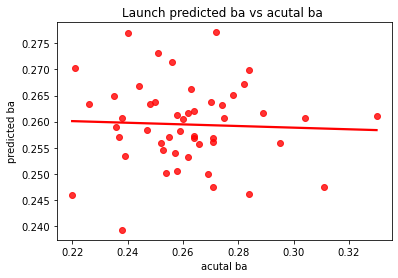

In [10]:
plot = sns.regplot(x=y_test, y=y_pred, ci=None, color="r")  
plot.set(xlabel='acutal ba', ylabel='predicted ba',title='Launch predicted ba vs acutal ba ') 

plt.show()

The plot shows that hit angle and hitting the ball at the ideal launch angles is an inconsistent predictor of batting average

# Create a linear regression to show the correlation between barrel rates and ba

In [156]:
X = hitters[['brl_percent','brl_pa',]].values
y = hitters['ba'].values 
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, 
                                                    random_state = 22, 
                                                    stratify = None)  
linreg = LinearRegression()  
# Fit the model to the training data
linreg.fit(X_train, y_train)

# Make predictions with test set
y_pred = linreg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [0.25501327 0.2641822 ], Actual Values: [0.264 0.25 ]


In [157]:
# Compute  MSE, R^2
mse = mean_squared_error(y_test, y_pred, squared=True) 
r_score = r2_score(y_test,y_pred)  
r_score

0.41364328599118894

In [158]:
mse

0.0003761059494142232

The correlation between barrel rates and battting average are much higher than exit velocity and launch angle metrics

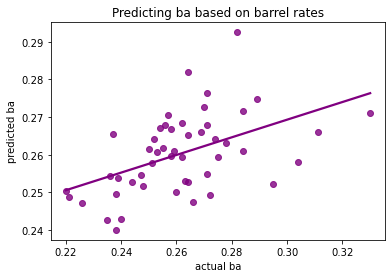

In [14]:
plot = sns.regplot(x=y_test, y=y_pred, ci=None, color="purple")  
plot.set(xlabel='actual ba', ylabel='predicted ba',title='Predicting ba based on barrel rates') 

plt.show()

# Take all the metrics used above and predict batting average

In [137]:
X = hitters[['brl_percent','brl_pa','anglesweetspotpercent','avg_hit_angle','ev50','avg_hit_speed','ev95percent']].values
y = hitters['ba'].values  
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, 
                                                    random_state = 22, 
                                                    stratify = None)  
linreg = LinearRegression() 
# Fit the model to the training data
linreg.fit(X_train, y_train)

# Make predictions with test set
y_pred = linreg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2])) 

Predictions: [0.25682836 0.26124224], Actual Values: [0.264 0.25 ]


In [138]:
# Compute  MSE, R^2
mse = mean_squared_error(y_test, y_pred, squared=True) 
r_score = r2_score(y_test,y_pred)    
r_score

0.6108063971131932

In [139]:
mse

0.00024963989670882326

Combining different types of metrics combined are more heavily correlated to predicitng batting average, which suggests that there are lot of different variables that go into predicting if a batter will have a higher batting average. 

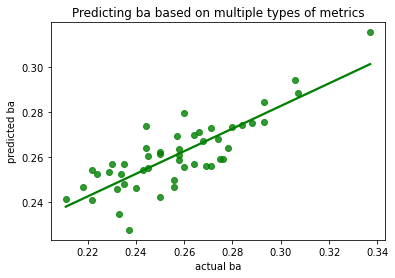

In [140]:
plot = sns.regplot(x=y_test, y=y_pred, ci=None, color="green")  
plot.set(xlabel='actual ba', ylabel='predicted ba',title='Predicting ba based on multiple types of metrics') 

plt.show()

The project was able to show which metrics are more heavily correlated to batting averge. Barrel Rates were more heavily correlated to batting average than launch angle or exit velocity metrics. It was also discovered that none of the metrics indivdually were well correlated to batting average based on their low R^2 scores. When the metrics were combined, the R^2 score increased drastically to 0.61. The accuracy of the project could be improved by adding more metrics to the eqaution to discover if they have more to do with batting average when they are separated and when they are combined with other metrics.